# GEOG5995M Portfolio assignment

Student ID number: 201578497



## Block One Submission
Using data introduced in the course create a visualisation showing the association between two variables. Using skills developed in the practical exercises take any steps required to clean or pre-process the data.  It is expected that you wills change the default appearance of the markers and include an appropriate title and axis labels. Further marks will be awarded for appropriate use of colour pallets, inclusion of additional categorical variables in the visualisation and other steps taken to ensure effective data visualisation. 

Ensure all the code has detialed comments.

Write a brief paragraph in markdown (max. 300 words) detailing the visualisation choices made given the types of data you have chosen. 

In [1]:
# import required packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the bike example dataset into a dataframe named bike...
fp = ('C:/Users/James/OneDrive - University of Leeds/01_CDT/01_GEOG5995M - Programming for Social Science/Assignmnet/Assignment_data/london_merged.csv')
bike = pd.read_csv(fp)
# View the 1st 5 records of the bike dataframe
bike.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [3]:
# Check the data types and see if there are any missing values in the dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [4]:
# Convert the timestamp column from an object to datetime data type.
bike['timestamp'] = pd.to_datetime(bike['timestamp'], format = 'mixed')
bike.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [5]:
# See if this has onverted the timestamp from object to datetime data type
bike.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
dtype: object

In [6]:
# Create a new column for the year_month - taken from the timestamp column - removing the day
bike['year_month'] = bike['timestamp'].dt.strftime('%Y-%m')
bike.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-04
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-04
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-04


In [7]:
# Create a new dataframe that consitsts of the same (bike) data, but shows a single record for each month (groupby) and also returns
# the data for each column as a result of the specified function for each column (sum, mean, etc.)
# Group the data by the month/year
bike_pm = bike.groupby('year_month').agg({
# Sum the count of bike shares for each month/year
    'cnt':'sum',
# Find the mean of t1, t2, hum and wind_speed of each months weather
    't1':'mean',
    't2':'mean',
    'hum':'mean',
    'wind_speed':'mean',
# Find the 'weathercode', 'is_holiday', 'is_weekend', and 'season' that appears most often for each day (mode), and if more than a single code
# is returned, choose the code with the highest value (i.e. the worst weather across the month).
    'weather_code':lambda x: x.mode().max(),
    'is_holiday':lambda x: x.mode().max(),
    'is_weekend':lambda x: x.mode().max(),
    'season':lambda x: x.mode().max(),
# Take the value of the month that appears first
    'year_month':'first'
})
# Check to see if this worked
bike_pm.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month
year_month,,,,,,,,,,
2015-01,694279,7.810417,5.387500,72.780556,17.879861,1,0,0,3,2015-01
2015-02,623336,9.110340,7.087191,75.222222,16.660494,1,0,0,3,2015-02
2015-03,707911,9.790210,8.262937,72.840210,16.360490,3,0,0,0,2015-03


In [8]:
# Get some basic statistics from the grouped data (bike_pd) (mean, std, min/max, etc..)
bike_pm.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7.372582e+05,11.599083,10.407936,73.623193,15.800397,1.370370,0.037037,0.037037,1.666667
std,2.917217e+05,3.880392,4.775862,5.563258,1.989803,1.244933,0.192450,0.192450,1.176697
min,6.421000e+03,3.395833,-0.625000,65.877778,11.166667,1.000000,0.000000,0.000000,0.000000
25%,6.949630e+05,9.243106,7.426124,69.946826,14.570486,1.000000,0.000000,0.000000,1.000000
50%,8.077540e+05,11.667594,10.661335,72.840210,15.443750,1.000000,0.000000,0.000000,2.000000
75%,9.104840e+05,14.454806,14.114635,75.448794,16.904553,1.000000,0.000000,0.000000,3.000000
max,1.100669e+06,17.789581,17.253721,88.437500,20.286319,7.000000,1.000000,1.000000,3.000000


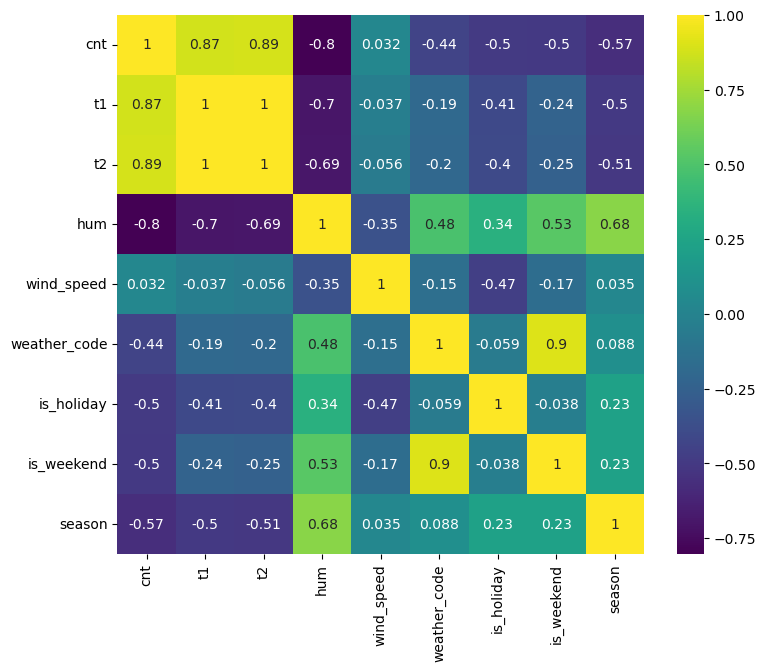

In [9]:
# plot a heatmap in a correlation table for the numeric values in bike_pd
# set figure size
plt.figure(figsize=(8.5,7))
sns.heatmap(bike_pm.select_dtypes(include=np.number).corr(),
# (annot= True) annotates the cells with the correlation value
            annot=True,
# cmap chooses the colour scheme used
            cmap = 'viridis');

In [10]:
# Map the season values to their corresponding labels so that visualisation is more easily interpreted later
season_labels = {0: "Spring", 1: "Summer", 2: "Autumn", 3: "Winter"}
weather_labels = {1:"Clear/Mostly clear", 2:"Scattered/Few clouds",
                  3:"Broken clouds", 4:"Cloudy", 7:"Rain shower/Light rain", 10:"Rain & thunderstorm", 26:"Snowfall", 94:"Freezing fog"}
# add these labels to the bikes dataframe
bike_pm['season_labels'] = bike_pm['season'].map(season_labels);
bike_pm['weather_labels'] = bike_pm['weather_code'].map(weather_labels);

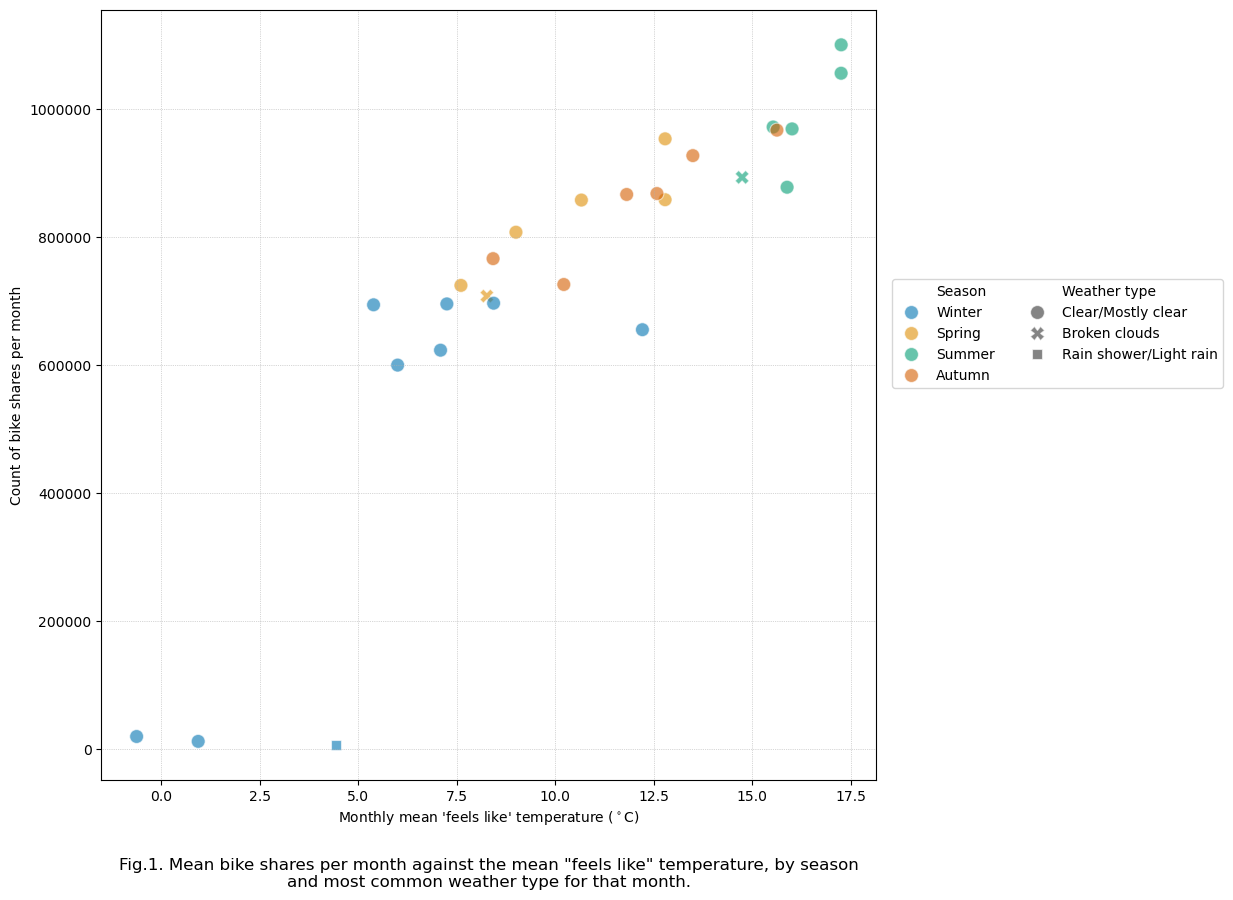

In [11]:
# Set the size of the plot
plt.figure(figsize=(10,10));
# Plot a scatter with seasons, weather type visualised
g = sns.scatterplot(
        # Set the data source
            data=bike_pm,
        # Set the x and y axis data to analyse
        # Use 'feels-like' temperature...
            x="t2",
        # against count of bike shares
            y="cnt",
        # Set the colour of the markers to change according to the season
            hue="season_labels",
        # Change the shape of the markers according to the weather type
            style="weather_labels",
        # Set the size of the markers
            s=100,
        # Set the opacity of the markers
            alpha = 0.6,
        # Set the colour palette to be used for the scatter points
            palette = 'colorblind')

# Add gridlines to the plot to make it easier to locate values
plt.grid(linestyle=':', linewidth=0.5)

# Set the axis label texts
plt.xlabel("Monthly mean 'feels like' temperature ($^\circ$C)")
plt.ylabel('Count of bike shares per month')

# Display the actual values on the y axis rather than scientific notation
plt.ticklabel_format(style='plain', axis='y');

# CREATE A CUSTOM LEGEND
legend = plt.legend(bbox_to_anchor=(1.02, 0.65),
                    loc='upper left',
                    borderaxespad=0,
                    ncol = 2
                   )
# Edit the legend text (instead of showing he variable name as the title
legend.texts[0].set_text('Season')
legend.texts[5].set_text("Weather type")

# Set the overall title of the plot
plt.title('Fig.1. Mean bike shares per month against the mean "feels like" temperature, by season\nand most common weather type for that month.',
          y=-0.15,
          fontsize = 12);

#### Bike Share Data Visualisation  

Fig.1. shows the total number of bike shares for each month in the data, versus the mean temperature for each month. Different seasons coloured  accordingly, and the weather type that was reported most often in each month is shown in the shape of the markers/points.

Firstly, by creating a correlation heatmap, this aided in choosing the two variables with the most positive relationship (*cnt* and *t2*), and which were to be displayed in the final plot.

To aid interpretability when plotting, the dataset was grouped by the month in which each observation occurred. This reduced the number of points of the plot, as opposed to plotting each observation grouped by day, which would have made the plot cluttered.

The season codes and weather codes were converted to readable labels, which again aided interpretability.

Because the two chosen variables ('count of bike share' and ‘feels-like’ temperature) are continuous data, a scatterplot was chosen to visualize the nature of relationship between them.

In order to explore the relationship, the 'feels-like' temperature variable was placed on the x-axis and the count of bike shares was placed on the y-axis.

The seasons in which each of the months being plotted fall are categorical, and were coloured using the 'colorblind' palette. This is an accessible palette to as many people as possible, including those with the most frequent types of colour-blindness.

The y-axis was converted from scientific notation to show actual counts and standard intervals, while the x-axis was set to show the mean temperatures. Each axis' scale remained as the default due to the nature of the data. The labels of each axis were replaced with a clear explanation of what they represent.

All the choices made to produce the plot mean that it can easily be interpreted by the lay reader, which is important when communicating data in the public domain.

## Block Two Submission: 
 
Using the course notebooks and lectures as a guide create a static visualisation showing the spatial distribution of a variable of your choice. The type of spatial visualisation chosen should be suitable for the data chosen and appropriate data cleaning and pre-processing steps undertaken. Using skills demonstrated in the python notebooks change the default appearance of the visualisation of choice. Include an appropriate title and legend labels. Further marks will be awarded for appropriate use of colour pallets and other customisations to aid interpretation and improve accessibility. Write a brief paragraph in markdown (max 300 words) detailing the visual design choices made. 

In [12]:
# import any further required packages
import geopandas as gpd
import pyproj
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs

In [13]:
# Load the countries dataset to be spatially visualised
countries_path = gpd.datasets.get_path('naturalearth_lowres')
countries = gpd.read_file(countries_path)
# Have a look at the data
countries

C:\Users\James\AppData\Local\Temp\ipykernel_25720\33468347.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries_path = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [14]:
# Calculate GDP per capita (GDP per person) for each country and make this a new column in the data called gdp_pc
countries['gdp_pc'] = (countries['gdp_md_est'] / countries['pop_est']) * 1000000
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pc
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",6175.607026
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1089.156033
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1503.515109
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",46194.708478
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",65297.517508
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7411.833736
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",8908.005793
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",4417.449539
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",17397.469342


In [15]:
# Get some basic stats about the data
countries.describe()

,pop_est,gdp_md_est,gdp_pc
count,1.770000e+02,1.770000e+02,177.000000
mean,4.324346e+07,4.934739e+05,16193.031208
std,1.513543e+08,2.019326e+06,25676.324854
min,1.400000e+02,1.600000e+01,261.218430
25%,3.301000e+06,1.346900e+04,1816.545232
50%,1.019232e+07,5.040000e+04,5789.643726
75%,3.182530e+07,2.619210e+05,17828.417039
max,1.397715e+09,2.143323e+07,200000.000000


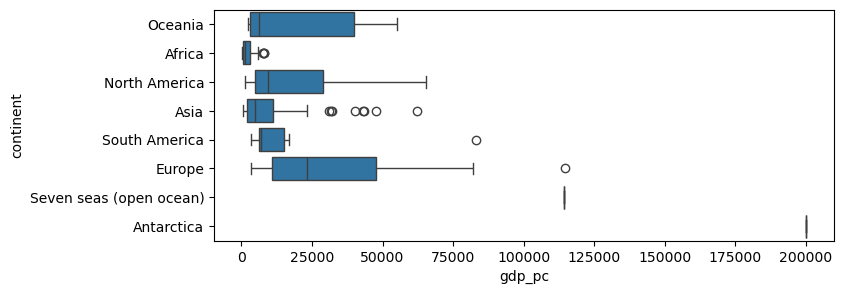

In [16]:
# Check for outliers
# Set the size of the plot
plt.figure(figsize=(8,3))
sns.boxplot(data = countries, x='gdp_pc', y='continent');

In [17]:
# Remove Antarctica from the dataset because it is a significant outlier and skews the data
countries = countries[(countries.continent != 'Antarctica')]
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pc
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",6175.607026
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1089.156033
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1503.515109
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",46194.708478
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",65297.517508
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7411.833736
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",8908.005793
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",4417.449539
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",17397.469342


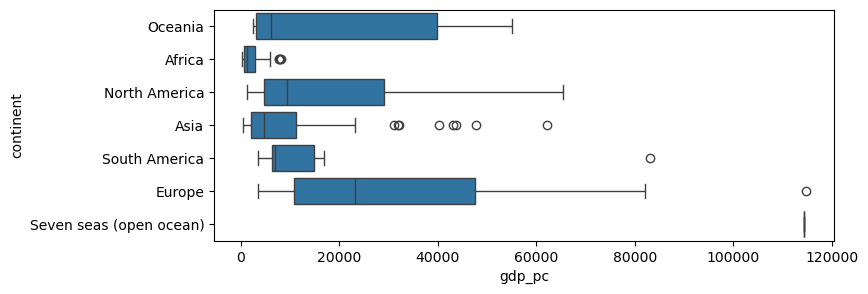

In [18]:
# Have another look at outliers and distribution
# Check for outliers - Seven seas shoudld be left in the dataset as there are island nations
# included in this which have permanent populations
# Set the size of the plot
plt.figure(figsize=(8,3))
sns.boxplot(data = countries, x='gdp_pc', y='continent');

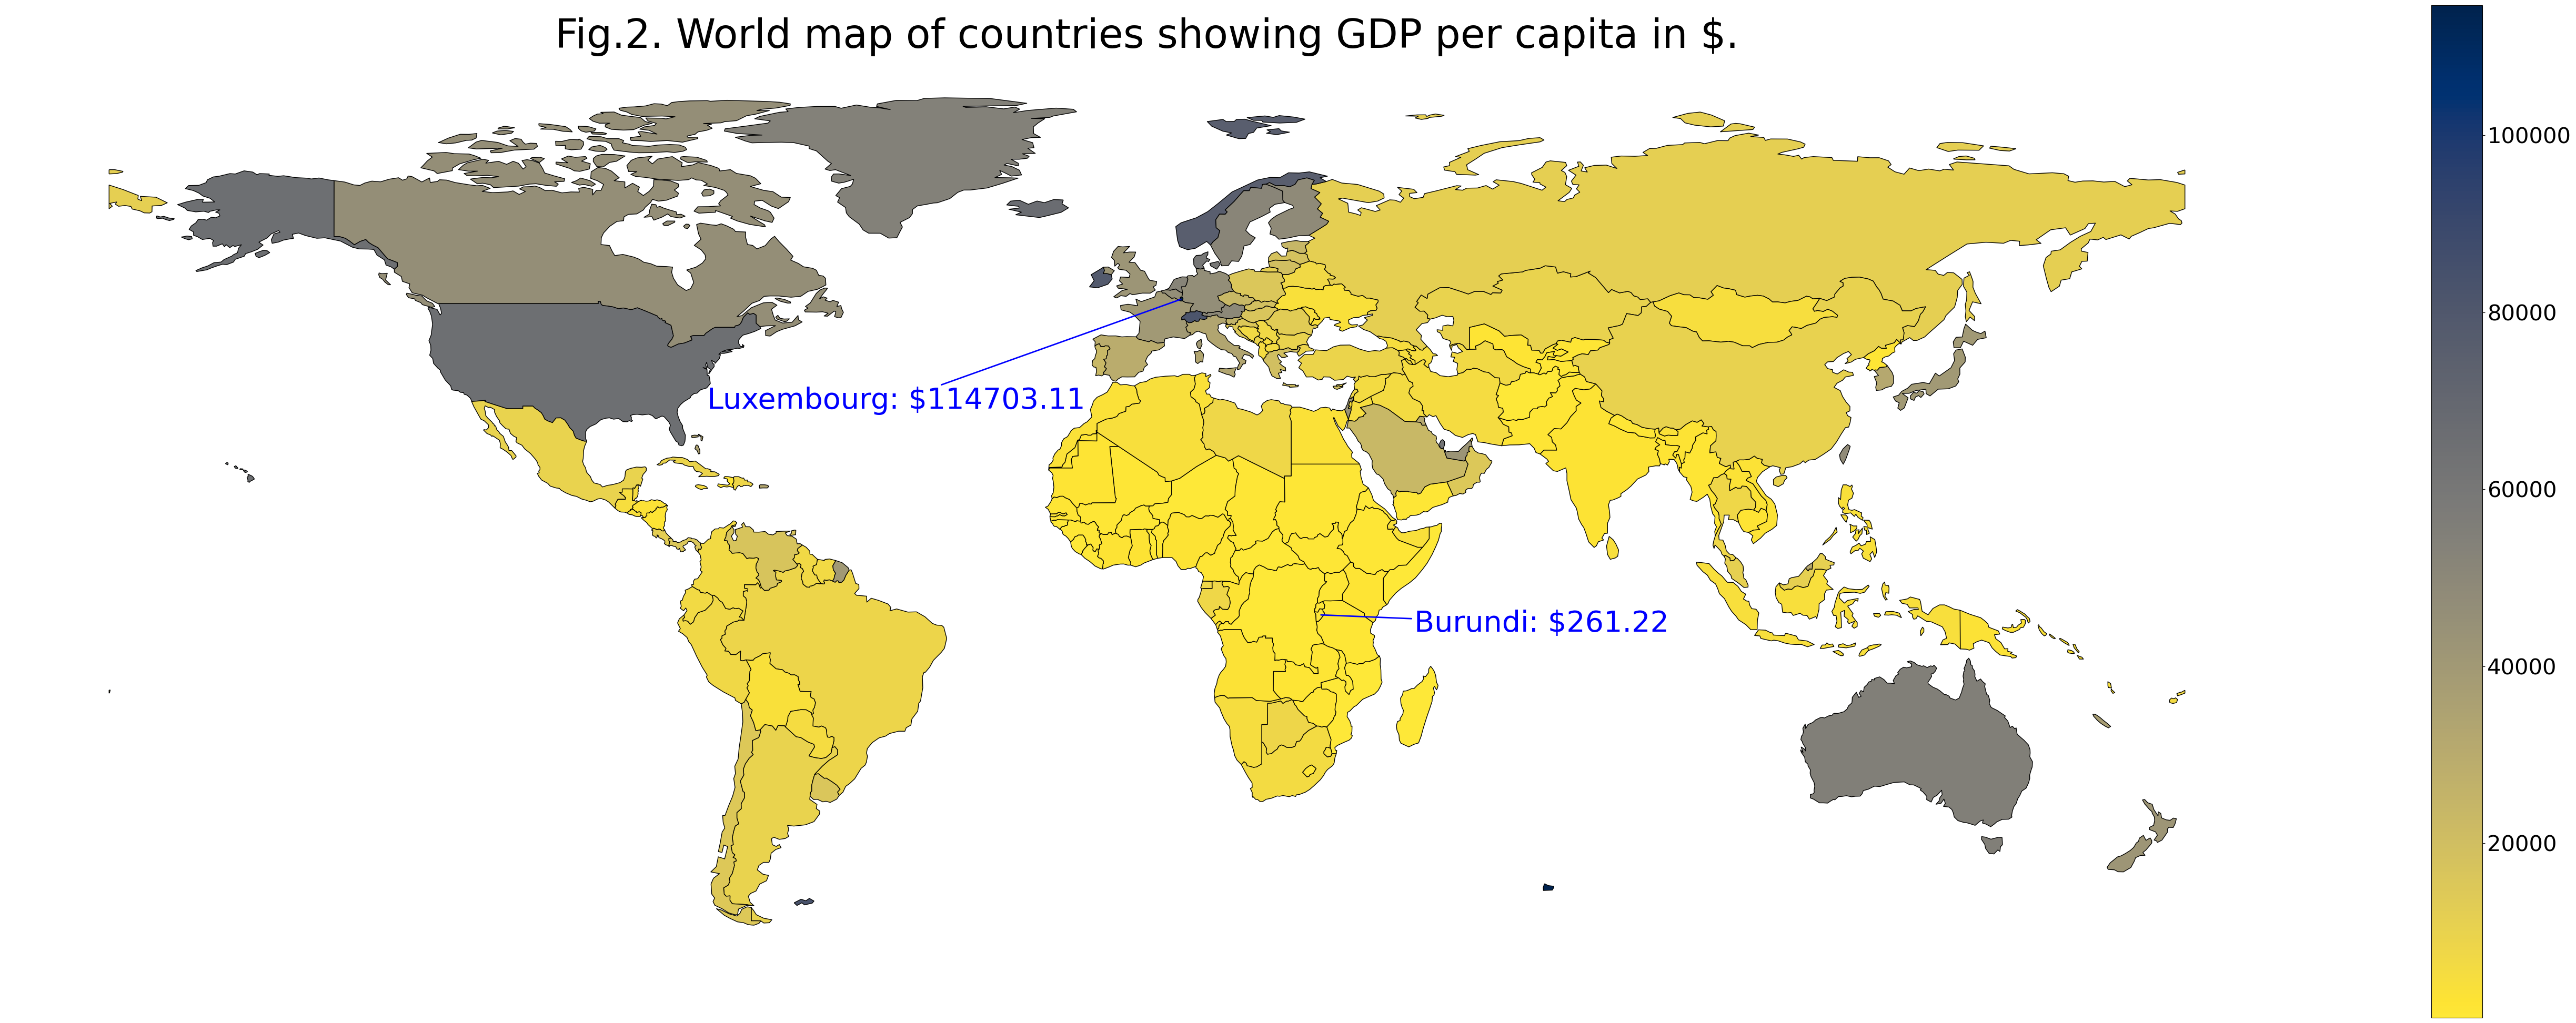

In [19]:
# Plot the data on a world map and add labels to show the country with the highes and lowest DGP Per Capita

# Find the country with the highest GDP per capita
highest_gdp_country = countries.loc[countries['gdp_pc'].idxmax()]

# Get the centroid coordinates of the highest GDP per capita country
centroid_x = highest_gdp_country.geometry.centroid.x
centroid_y = highest_gdp_country.geometry.centroid.y

# Find the country with the lowest GDP per capita
lowest_gdp_country = countries.loc[countries['gdp_pc'].idxmin()]

# Get the centroid coordinates of the lowest GDP per capita country
lcentroid_x = lowest_gdp_country.geometry.centroid.x
lcentroid_y = lowest_gdp_country.geometry.centroid.y

# plot one subplot (i.e. 1 map)
f, ax = plt.subplots(1, figsize=(70, 25))

# define the basemap and plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the countries on the basemap colouring them according to their GDP Per Capita (gdp_pc) 
countries.plot(
# put the countries on the same axis as the 'base' map
    ax=base,
# colour the countries by the gdp_pc column
    column='gdp_pc',
# Add a legend
    legend=True,
# Set the colour scheme
    cmap='cividis_r',
# Set the opacity of the colours
    alpha = 1,
# Set the border colour to black
    edgecolor='black'
              )
# Add a callout arrow pointing to the highest GDP per capita country
# Add the text to be displayed on the callout
htxt = highest_gdp_country['name'] + ": $" + str(highest_gdp_country['gdp_pc'].round(2))

# Start setting the annotation details
ax.annotate(
# Set the label text
    htxt,  
# Set the arrow tip coordinates
    xy=(centroid_x, centroid_y),
# Text coordinates (offset from the arrow tip)
    xytext=(centroid_x + -655,
            centroid_y + -200),
    textcoords='offset points',
# Set the arrow properties
    arrowprops=dict(arrowstyle='-',
                    color='blue',
                    linewidth=2),
# Set the font size of the label
    fontsize=40,
# Set the text color
    color='blue'
            )

# Do the same for the the lowest GDP per capita country
ltxt = lowest_gdp_country['name'] + ": $" + str(lowest_gdp_country['gdp_pc'].round(2))
ax.annotate(
    ltxt,
    xy=(lcentroid_x, lcentroid_y),
    xytext=(lcentroid_x + 100, lcentroid_y + -20),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='-', color='blue', linewidth=2),
    fontsize=40,
    color='blue'
)

# SET THE LEGEND
# The legend is a Colourbar object.
# To change the legend's font size, get hold of the Colorbar's 'Axes' object, and call/change .tick_params() on that.

# Get the colorbars axes object
fig = ax.figure

# set cb_ax to the 2nd index of the 2 Axes indexes in the plot - (index 0 = the map / index 1 = the colourbar)  
cb_ax = fig.axes[1]

# Set the font size of the Colourbar.
cb_ax.tick_params(labelsize=30)

# Make the map axis invisible
ax.set_axis_off()

# Add an overall title to the plot
plt.title('Fig.2. World map of countries showing GDP per capita in $.',
          fontsize = 55)

# show the map
plt.show();

### Block Two Submission
Fig.2. Shows 176 countries in the data, shaded by GDP per capita, with the country that had the highest, and the country that had the lowest GDP per capita labeled accordingly.

Creating Fig.2. involved calculating the GDP per capita as a new data column and cleaning the resulting data of any outliers. In this caseonly , Antarctica was removed because it has no permanent population'. Seven Se'as data was preserved because these islands have permanent populations. Due to the resulting number of observations (176), the polygon geometry was maintained, instead of calculating centroids, to reduce overlapping of centroids and to aid visibility when mapping.

Choosing to plot the world map at a high resolution allows manual resizing of the image through zooming the page and maintains clarity, allowing countries to be distinguished from each o (e.g., Luxembourg)ther. Line color for country borders was also set to black so that countries can be differentiated.

Representing GDP per capita using a reversed 'cividis_r' color ramp meant that the countries with the highest GDP per capita were seen as darker on the map. This was preferable to the default direction of color shading and allowed c to be viation of the individual countriesa This colour palette is one of the colour palettes that is most easily seen by as many people as possible, including those with most forms of colour-blindness.lized.

To highlight the disparities between the GDP per capita data, callout text labels were added to the country with the highest and the country with the lowest GDP per capita in the data.

Legend properties were edited to make label text larger on the scale, making them more visible.

Finally, an overall title was added to the plot to explain what the Overall, this map can be easily interpreted by all that view it, and the choices made during its production had accessibility in mind throughout.ows.







